In [1]:
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.datasets import make_classification
import numpy as np


In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [12]:
#We already have data loaded to X_train, X_test, y_train, y_test
#Vales of Weight vector and intercept term are initially set to 0

In [13]:
#Sigmoid function
def sigmoid(w,x,b):
    val=1/(1+np.exp(-(np.dot(x,w.T)+b)))
    return val

In [14]:
#Log Loss function
# Log loss= -((1/N)*[(y*log(p))+((1-y)*log(1-p))])
def log_loss(w,x,b,y):
    sigmoid_val=sigmoid(w,x,b)
    first_term=y*np.log(sigmoid_val)
    second_term=(1-y)*np.log(1-sigmoid_val)
    val=-((first_term+second_term)/(len(x)))
    return np.sum(val)

In [15]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

In [22]:
def SGD(w,b,epoch,x_train,y_train,x_test,y_test):
    log_loss_train=[]
    log_loss_test=[]
    N=len(x_train)
    #Caluculate initial log loss and storing the values
    log_loss_train.append(log_loss(w,x_train,b,y_train))
    log_loss_test.append(log_loss(w,x_test,b,y_test))
    
    for epo in tqdm(range(epoch)):
        for i in range(N):
            w= ((1-(alpha*eta0)/N)*w)+((alpha*x_train[i])*(y_train[i]-sigmoid(w,x_train[i],b)))
            b= (b+(alpha*(y_train[i]-sigmoid(w,x_train[i],b))))
        log_val_train=log_loss(w,x_train,b,y_train)
        log_val_test=log_loss(w,x_test,b,y_test)
        log_loss_train.append(log_val_train)
        log_loss_test.append(log_val_test)
        if abs((np.sum(log_loss_train[epo+1]-log_loss_train[epo])))<=0.0001:
            print('Updation is completed in {} epochs'.format(epo+1))
            break
        
    return w,b,log_loss_train,log_loss_test,epo+1

In [23]:
epochs=20
updated_w,updated_b,train_log_loss,test_log_loss,convergence_epoch=SGD(w,b,epochs,X_train,y_train, X_test, y_test)

  0%|          | 0/20 [00:00<?, ?it/s]

Updation is completed in 10 epochs


In [18]:
print(updated_w)
print(updated_b)

[-0.42315311  0.19095979 -0.14588118  0.33814991 -0.21196623  0.56525978
 -0.44538357 -0.09171679  0.21795314  0.16977398  0.19522044  0.00229554
 -0.07781461  0.33882618  0.02214234]
-0.8500967712837224


In [19]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
updated_w-clf.coef_, updated_b-clf.intercept_

(array([[ 0.0002138 ,  0.00548413,  0.00270918, -0.00329416, -0.00377953,
          0.00509399,  0.00704126,  0.00237134,  0.00867994, -0.01106728,
         -0.00183147, -0.00192361,  0.00178909,  0.00029817, -0.00052487]]),
 array([0.00304153]))

In [20]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(updated_w,updated_b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(updated_w,updated_b,X_test))/len(X_test))

0.95536
0.95296


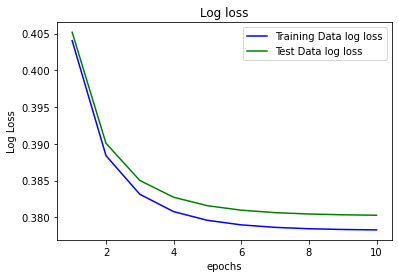

In [21]:
import matplotlib.pyplot as plt
#Plotting without initial log loss as it is very high and makes the two curve in the plot to be not clear
plt.plot(range(1,convergence_epoch+1),train_log_loss[1:], label='Training Data log loss', color='blue')
plt.plot(range(1,convergence_epoch+1),test_log_loss[1:], label='Test Data log loss', color='green')


plt.ylabel('Log Loss')
plt.xlabel('epochs')
plt.title('Log loss')
plt.legend()
plt.show()